In [ ]:
#!pip install fastai # run this one if you don't have fastai installed

In [466]:
from fastai import *
from fastai.vision import *

def softmax(x):
    e=np.exp(x)
    return e/np.sum(e,axis=0)

def cross_entropy_loss(yc,y):
    return -np.sum(yc*np.log(y))
    
def return_drelu(dL,x): # y=max(x,0)
    dx=np.zeros_like(x)
    dx[x>0]=dL[x>0]
    return dx


In [467]:
# please complete the following functions, they should return gradient for a linear layer, note that x is input
# as a batch, each column is one sample

def return_dW(dL,W,x): # say y = W x, compute dL/dW given x and dL/dy (=dL), make sure you can handle batch
    fan_out, fan_in = W.shape
    batch_size=x.shape[1]
    
    dW=np.zeros_like(W) # you should replace this line
    return dW

def return_dx(dL,W,x):
    fan_out, fan_in = W.shape
    batch_size=x.shape[1]
    
    dx=np.zeros_like(x) # you should replace this line
    return dx


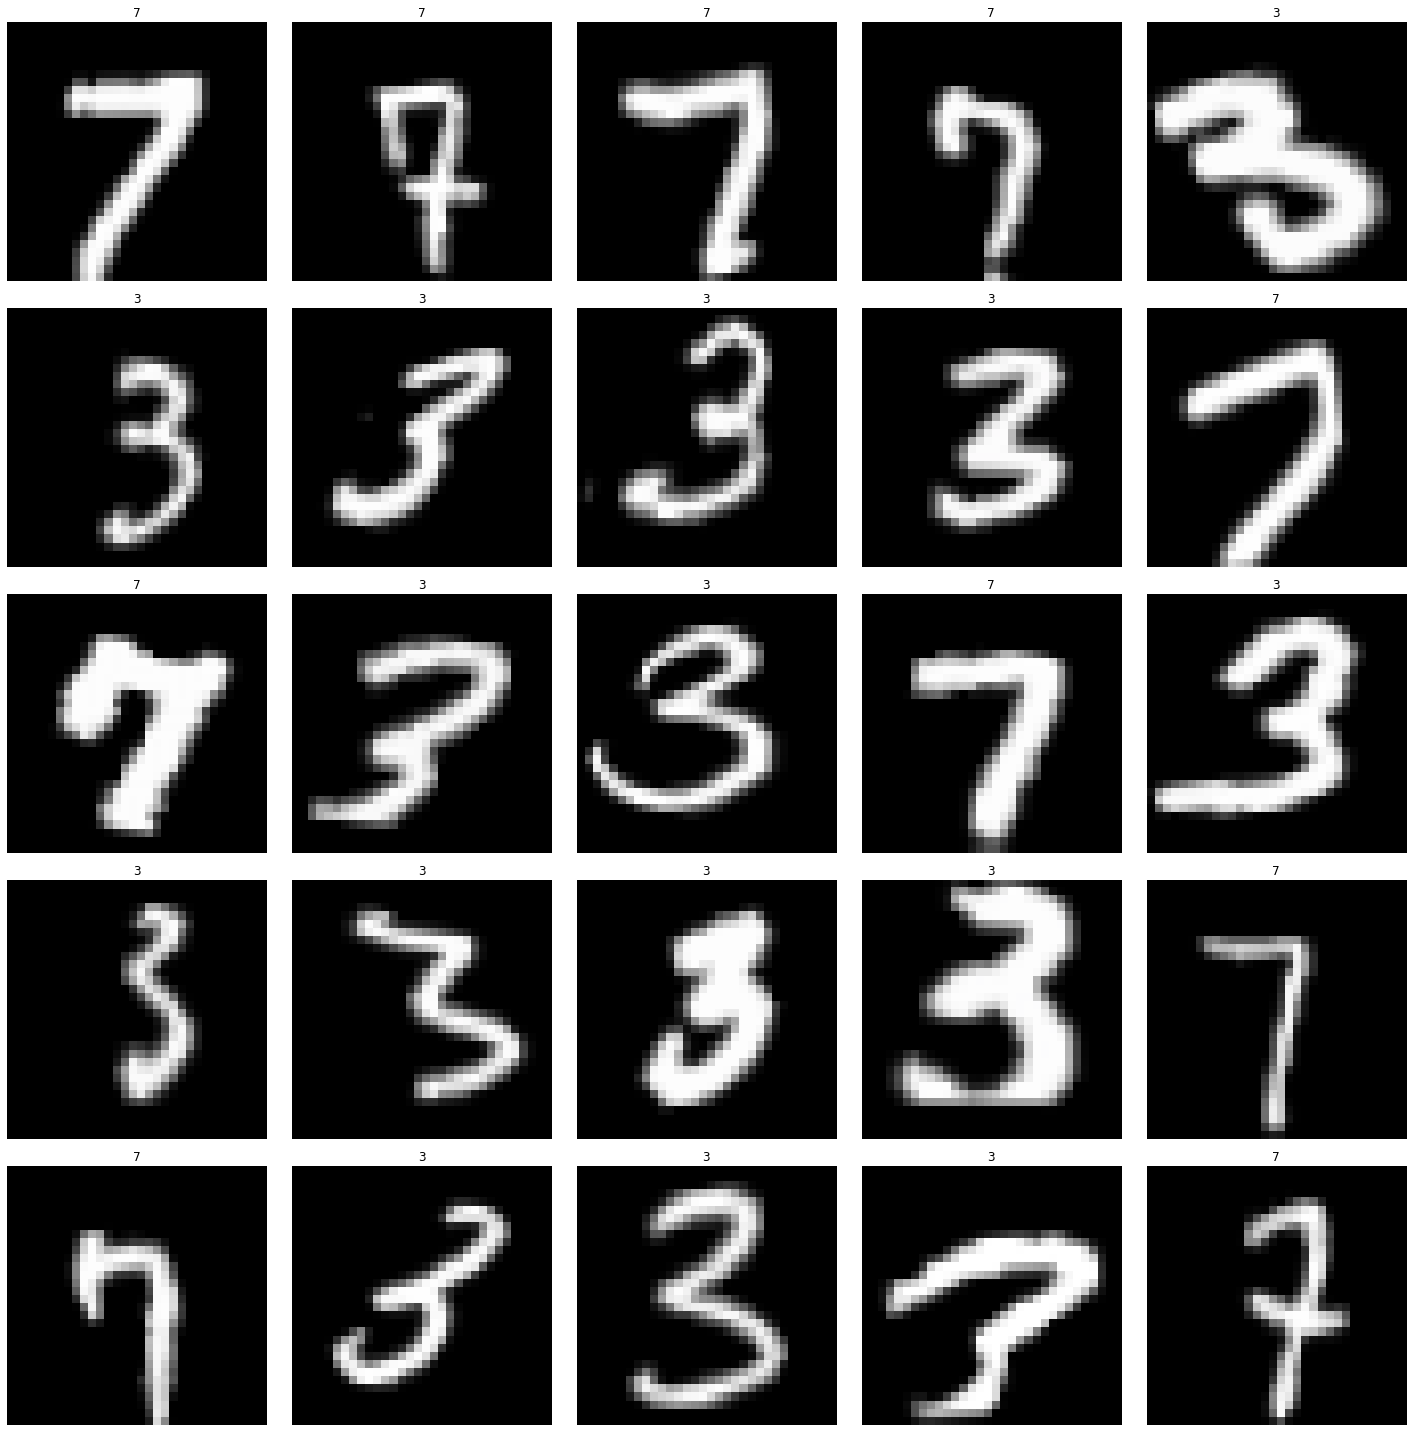

In [468]:
mnist=untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))

data.show_batch()

In [469]:
from matplotlib import pyplot as plt
import numpy as np
import torch

# read a batch
batch=data.one_batch()
# batch=my_batch()

# get image dimensions
batch_size,no_channels,dimx,dimy=batch[0].shape
Nx=dimx*dimy+1

# initialize parameters
learning_rate=0.0005
N1=200 # number of neurons in first hidden layer
N2=150 # number of neurons in second hidden layer

W1=np.random.randn(N1,Nx)/np.sqrt(Nx/2) # Xavier initialization
W2=np.random.randn(2,N1)/np.sqrt(N1/2)


for it in range(50):
    # reformat batch
    x=np.array(batch[0])
    x=x[:,0,:,:] # just take the first color (grayscale image anyway)
    x=np.reshape(x,(x.shape[0],-1)).transpose()
    x=np.concatenate((x,np.ones((1,64))))
    label=np.array(batch[1])
    yc=np.zeros((2,len(label)))
    yc[label,range(len(label))]=1

    # forward pass
    z1=W1 @ x
    y1=np.maximum(0,z1) # relu
    z2=W2 @ y1
    y=softmax(z2)

    # compute gradient
    dz2=y-yc

    dW2=return_dW(dz2,W2,y1)
    dy1=return_dx(dz2,W2,y1)
    
    dz1=return_drelu(dy1,z1)
    
    dW1=return_dW(dz1,W1,x)

    # gradient descent
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2

    # print cost and training error rate
    print('Cost: %s, Error rate: %s' % (cross_entropy_loss(yc,y),sum(np.abs((y[0]>0.5).astype(np.int)-yc[0]))/batch_size))
    batch=data.one_batch()



Cost: 47.797879802297196, Error rate: 0.484375
Cost: 42.2622450133658, Error rate: 0.421875
Cost: 37.846401790709955, Error rate: 0.296875
Cost: 32.516617629101155, Error rate: 0.203125
Cost: 34.23425805551955, Error rate: 0.296875
Cost: 31.053905064803214, Error rate: 0.1875
Cost: 27.79803109718408, Error rate: 0.171875
Cost: 27.03478421627421, Error rate: 0.125
Cost: 29.468213532405272, Error rate: 0.15625
Cost: 24.68582933561504, Error rate: 0.15625
Cost: 25.550709922115754, Error rate: 0.109375
Cost: 21.110219028980275, Error rate: 0.046875
Cost: 21.662174389769625, Error rate: 0.125
Cost: 20.262755287597066, Error rate: 0.09375
Cost: 23.602739863639975, Error rate: 0.15625
Cost: 22.964104143513868, Error rate: 0.09375
Cost: 23.214759911763913, Error rate: 0.140625
Cost: 22.298488063265605, Error rate: 0.15625
Cost: 19.90389806072907, Error rate: 0.140625
Cost: 20.44047997205177, Error rate: 0.109375
Cost: 18.400151318778867, Error rate: 0.09375
Cost: 20.30729932224647, Error rate: